# Boston Housing Dataset

This notebook will contain a regression analysis for the Boston Housing dataset, a well-known public dataset originally published as part of the UCI Machine Learning Repository. Here we will analyzes factors like crime rate, economic status, commercial zoning, and others and how they may affect housing value in various 1970s Boston neighborhoods.

In [119]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [120]:
df = pd.read_csv("housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


There are 13 attributes in each case of the dataset. They are:	

* <b> CRIM: </b>per capita crime rate by area
* <b> ZN: </b>proportion of residential land zoned for lots over 25,000 sq.ft. 
* <b> INDUS: </b>proportion of non-retail business acres per area
* <b> CHAS: </b>Charles River boolean variable (1 if tract bounds river; 0 otherwise) 
* <b> NOX: </b>nitric oxides concentration (parts per 10 million) 
* <b> RM: </b>average number of rooms per dwelling 
* <b> AGE: </b>proportion of owner-occupied units built prior to 1940 
* <b> DIS: </b>weighted distances to five Boston employment centres 
* <b> RAD: </b>index of accessibility to radial highways 
* <b> TAX: </b>full-value property-tax rate per 10,000USD
* <b> PTRATIO: </b>pupil-teacher ratio by area
* <b> LSTAT: </b> % lower economic status of the population 
* <b> <font color='red'> MEDV: </font> </b> Median value of owner-occupied homes in 1000USD

Let's do a quick scan of what our data looks like:

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [122]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [123]:
df.isnull().values.any()

False

We have 12 features, all numerical. 9 of these are float/decimal values, while 2 of them are integers, and the last one (CHAS) is a boolean variable. No missing values, relatively standard distributions with a couple moderately skewed distributions and maybe a few outliers. But for the most part, this data is very clean and ready for regression.

Our next goal is to see which data is most strongly associated with housing value. Looking at the correlation between MEDV and all other variables:

In [124]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


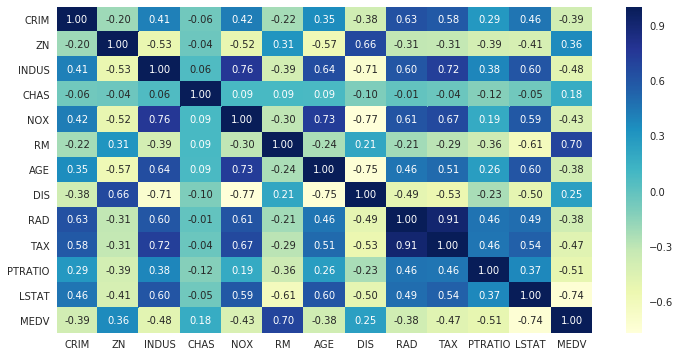

In [125]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap='YlGnBu')

We can see immediately that some variables seem to have a stronger relationship with MEDV than others. The independent variables with the strongest relationship with MEDV appear to be LSTAT (proportion of working poor, with R=-0.74), RM (number of rooms, with R=0.70), PTRATIO (teacher-student ratio, with R=-0.51), INDUS (proportion of non-retail business land, with R=-0.48), and TAX (property tax rate, with -0.47). Let's try narrowing our dataset down to these variables:

In [126]:
df2 = df[["LSTAT", "RM", "PTRATIO", "INDUS", "TAX", "NOX", "MEDV"]]

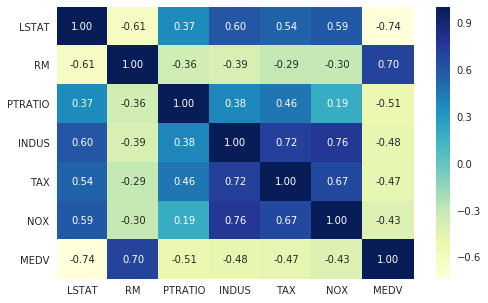

In [127]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(), annot = True, fmt = ".2f", cmap='YlGnBu')

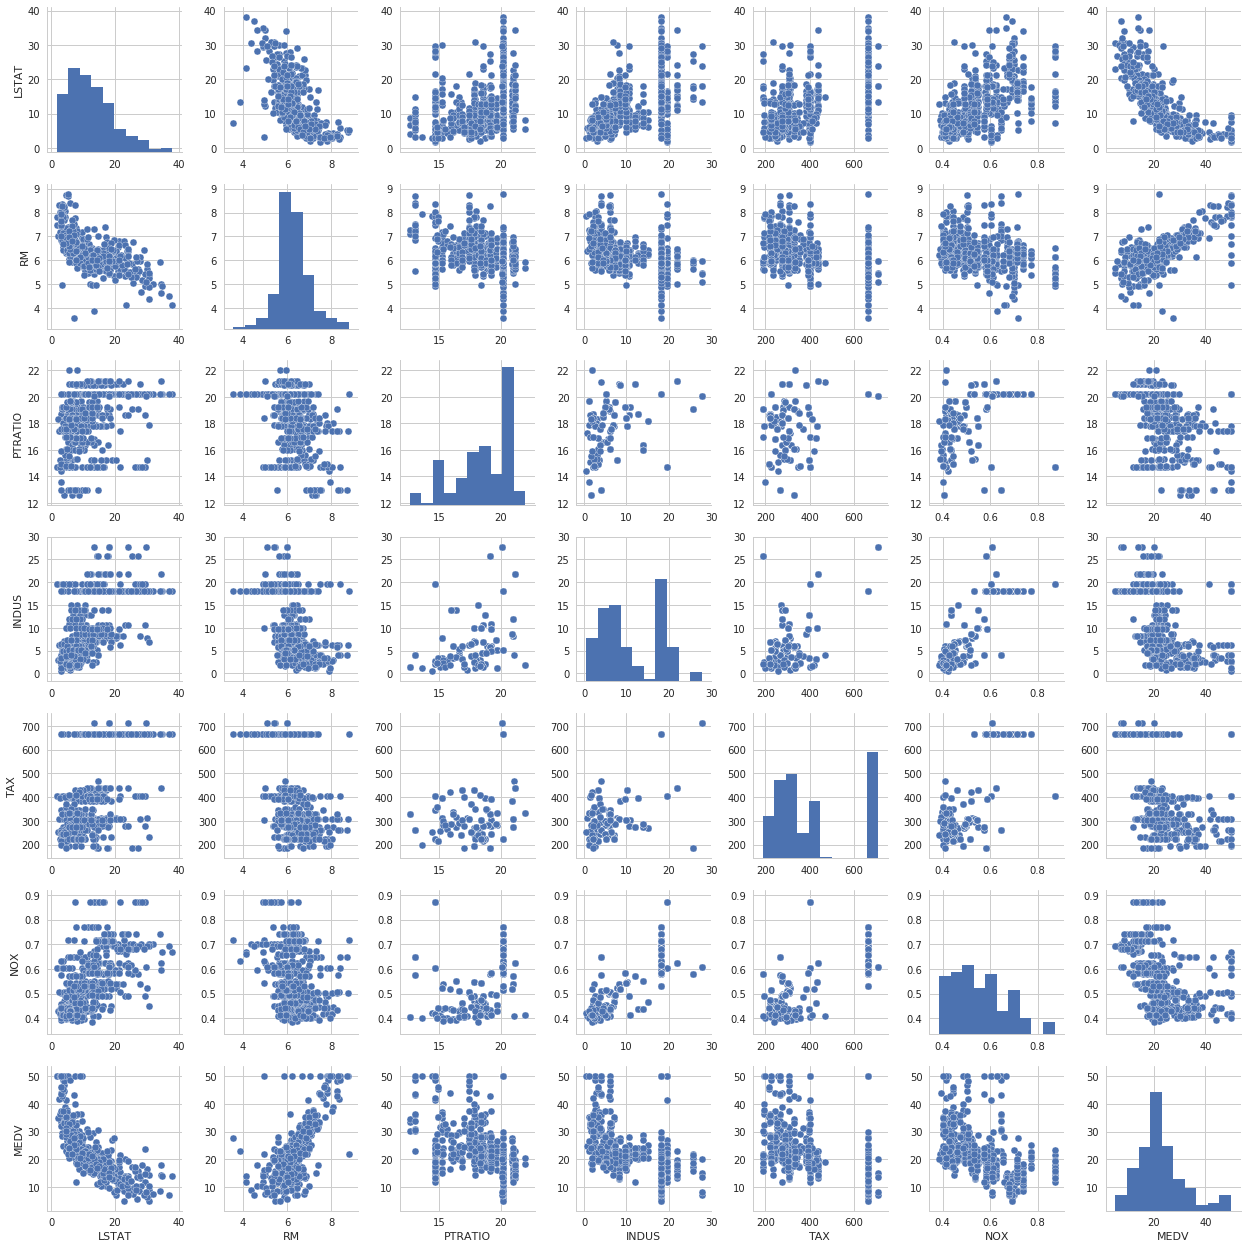

In [128]:
sns.pairplot(df2)

Let's have an even closer look at the two most important variables, starting with RM, the average number of rooms per dwelling:

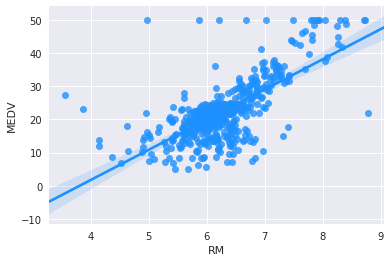

In [129]:
sns.set(style="darkgrid", color_codes=True)
sns.regplot(x="RM", y="MEDV", data=df, color='dodgerblue');

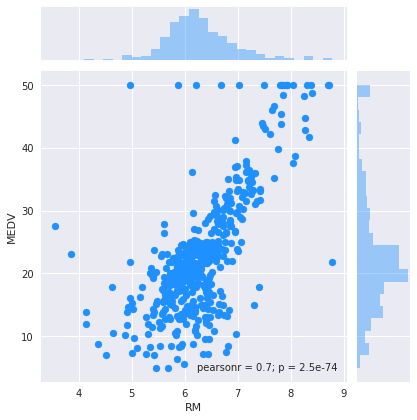

In [130]:
sns.jointplot(x="RM", y="MEDV", data=df, color='dodgerblue');

We can conclude from above that RM is strongly and linearly correlated with housing value, as evidenced by the scatter plot above and a strong R value of 0.7. Intuitively, this checks out, as more rooms requires more housing size and housing size almost always requires a higher cost to build. Now looking at LSTAT:

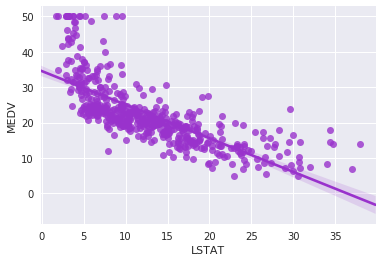

In [131]:
sns.regplot(x="LSTAT", y="MEDV", data=df, color = 'darkorchid');

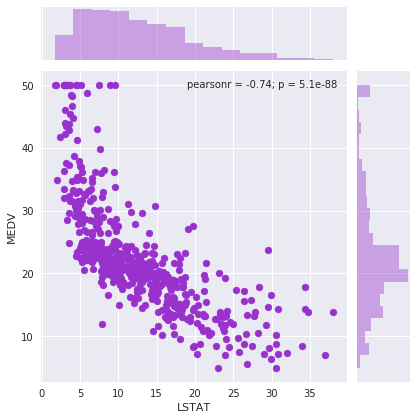

In [132]:
sns.jointplot(x="LSTAT", y="MEDV", data=df, color = 'darkorchid');

Here we observe an even stronger relationship between housing value and LSTAT, the proportion of the population with lower economic status. Intuition would lead us to believe this is a strong predictor and our R value (-0.74) confirms that housing value goes down as the proportion of low-income individuals goes up in a town. However, we can notice that the relationship is not strictly linear. Since R (correlation) is stricly a measure of linear relatedness, some of the information may not be properly covered in a simple correlation analysis. Since our histogram is left-skewed, we can make our LSTAT distribution more normal by doing a logarithmic transform, and this will improve our predictive power and strengthen our argument that LSTAT is stronly associated with MEDV:

In [133]:
df2["LSTAT_LOG"] = np.sqrt(df2["LSTAT"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


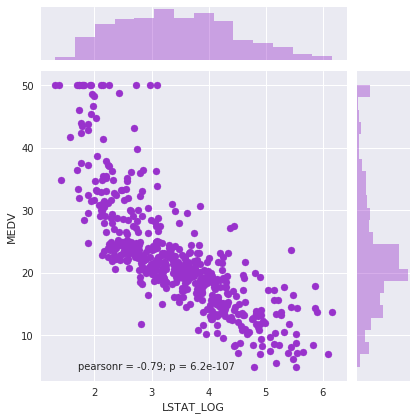

In [134]:
sns.jointplot(x="LSTAT_LOG", y="MEDV", data=df2, color = 'darkorchid')

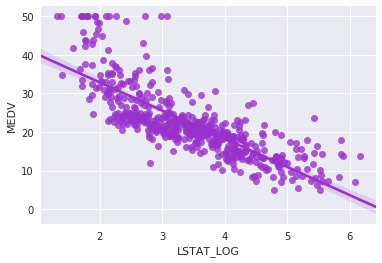

In [135]:
sns.regplot(x="LSTAT_LOG", y="MEDV", data=df2, color = 'darkorchid');

Notice that the correlation jumps up to -0.79. This will be our strongest predictor by far. We'll use the log-transformed version in our dataset. Now to try the next variables:

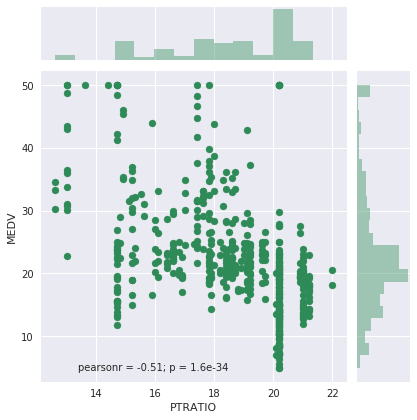

In [136]:
sns.jointplot(x="PTRATIO", y="MEDV", data=df2, color = 'seagreen')

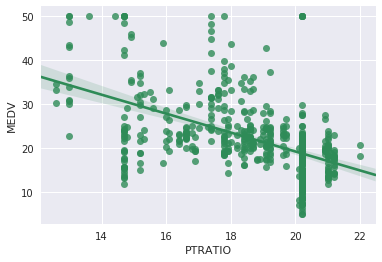

In [137]:
sns.regplot(x="PTRATIO", y="MEDV", data=df2, color = 'seagreen');

As demonstrated by an R value of -0.51, home value is negatively associated with an increase in students compared to the number of teachers. Since student-teacher ratio is often a metric representative of either education quality or education funding: this can imply there's a moderate relationship between the values of houses and Boston and education. One potential solution would be investment in more education in target areas that we're looking to increase home values: if schools are known to be higher quality and have more ammenities, parents may be more inclined to move to an area that they feel is better for their children. As a caveat, this data point would need more study before taking any explicit action, because a simple correlation isn't enough to establish a causal relationship: it could very well be that higher home values is driving up competition for more competitive teaching positions. But the relationship is interesting enough to be worthy of further investigation.

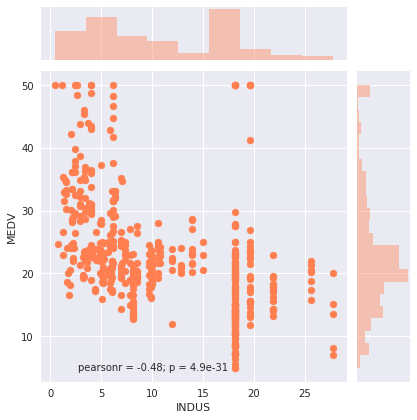

In [138]:
sns.jointplot(x="INDUS", y="MEDV", data=df2, color = 'coral')

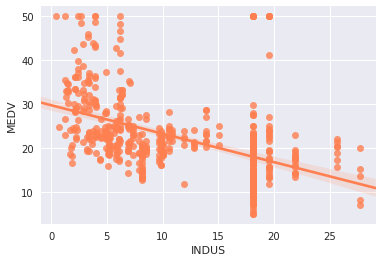

In [139]:
sns.regplot(x="INDUS", y="MEDV", data=df2, color = 'coral');

INDUS represents the proportion of non-retail business acres in town, and shows a moderate negative correlation of -0.48 with home value in Boston. This one is a bit difficult to interpret due to the specificity of the variable. It could imply that industrial business can be undesirable for potential housing buyers: factories and smog may reduce 

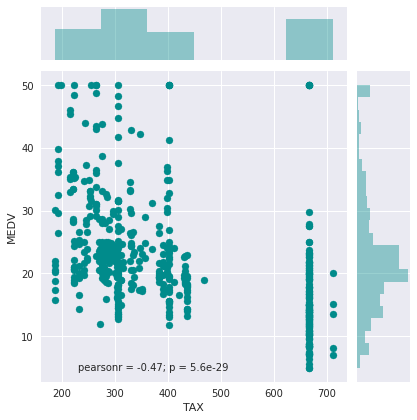

In [140]:
sns.jointplot(x="TAX", y="MEDV", data=df2, color = 'darkcyan')

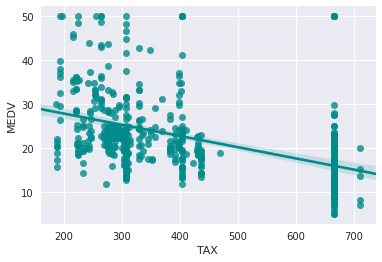

In [141]:
sns.regplot(x="TAX", y="MEDV", data=df2, color = 'darkcyan');

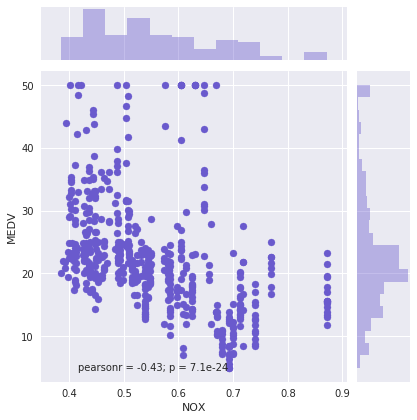

In [142]:
sns.jointplot(x="NOX", y="MEDV", data=df2, color = 'slateblue')

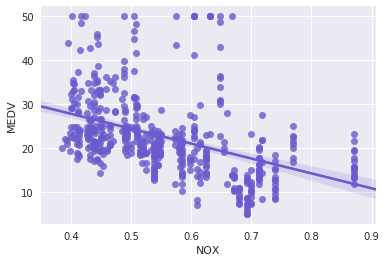

In [143]:
sns.regplot(x="NOX", y="MEDV", data=df2, color = 'slateblue');

# Multiple Regression

First, we will try training a model with our default data to get an idea for a baseline performance. Using the first dataframe we have with all available variables and no transformations, we can run a regression. First starting with a train-test split:

In [144]:
from sklearn.model_selection import train_test_split
X = df.drop(['MEDV'], axis = 1)
Y = df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Now to fit a linear regression model:

In [145]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We will do some repeated tests to get an estimate of how good a base model is for predicting housing value. We will use R2 as our performance metric.

In [149]:
from sklearn import metrics

r2_scores = []
for i in range(0,250):
    X = df.drop(['MEDV'], axis = 1)
    Y = df['MEDV']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    prediction = lm.predict(X_test)
    r2 = metrics.r2_score(Y_test, prediction)
    r2_scores.append(r2)
print(np.average(r2_scores))

0.713064853203


Now trying with our cleaned up data and transformation:

In [150]:
df2 = df[["LSTAT", "RM", "PTRATIO", "INDUS", "TAX", "NOX", "MEDV"]]
df2 = df
df2["LSTAT_LOG"] = df2["LSTAT_LOG"] = np.log(df2["LSTAT"])
X = df2.drop(['MEDV', 'LSTAT'], axis = 1)
Y = df2['MEDV']

In [151]:
r2_scores = []
for i in range(0,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    prediction = lm.predict(X_test)
    r2 = metrics.r2_score(Y_test, prediction)
    r2_scores.append(r2)
print(np.average(r2_scores))

0.762632136717


Finally, we can generate learning curves for our models. This lets us identify the amount of bias and variance in our model so we can reduce error accordingly.

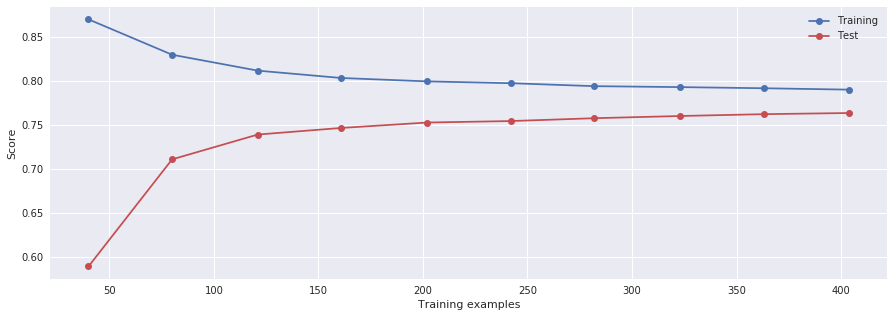

In [153]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
estimator = lm
train_sizes=np.linspace(.1, 1.0, 10)

plt.figure(figsize=(15,5))
plt.title("")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
estimator, X=X, y=Y, cv=ShuffleSplit(n_splits=100, test_size=0.2, random_state=0), n_jobs=-1,
train_sizes=np.linspace(.1, 1.0, 10))

train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test")
plt.legend(loc="best")